# IMPORTING LIBRARIES

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline

In [18]:
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

# USER DEFINED FUNCTIONS

In [19]:
def filling_choice(data):
  df = data.copy()
  cols = df.columns.to_list()
  results = []
  difference = []
  df = df.dropna()
  df.reset_index(drop=True)

  for col in range(len(cols)):
    ffill = 0
    bfill = 0

    for i in range(1,df.shape[0]-1):
      last_ = df.iloc[i-1,col]
      next_ = df.iloc[i+1,col]
      present_ = df.iloc[i,col]

      if(present_==last_):
        ffill +=1
      if(present_==next_):
        bfill +=1

    diff = ffill - bfill
    if(diff>0):
      results.append("ffill")
    elif(diff<0):
      results.append("bfill")
    else:
      results.append("equal")
    
    difference.append(abs(diff))
    
  stats = pd.DataFrame()
  stats['Columns'] = cols
  stats['Filling_Method'] = results
  stats['Difference'] = difference

  return stats    

In [48]:
def get_majority(df):
  final=[]
  for i in range(df.shape[0]):
    if(df.loc[i,:].to_list().count(1)>2):
      final.append("Y")
    else:
      final.append("N")
  return final

# DATA STATS

In [20]:
orig_train = pd.read_excel("Project - 4 - Train Data.xlsx")
orig_test = pd.read_excel("Project - 4 - Test Data.xlsx")

In [21]:
train = orig_train.copy()
test = orig_test.copy()

In [22]:
print("Train data shape: {}".format((train.shape)))
print("Test data shape: {}".format((test.shape)))

Train data shape: (614, 20)
Test data shape: (367, 19)


In [23]:
#train.columns

In [24]:
#train.head()

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loanapp_ID      614 non-null    object 
 1   Sex             601 non-null    object 
 2   Marital_Status  611 non-null    object 
 3   first_name      614 non-null    object 
 4   last_name       614 non-null    object 
 5   email           614 non-null    object 
 6   address         614 non-null    object 
 7   Dependents      599 non-null    object 
 8   Qual_var        614 non-null    object 
 9   SE              582 non-null    object 
 10  App_Income_1    614 non-null    float64
 11  App_Income_2    614 non-null    float64
 12  CPL_Amount      612 non-null    float64
 13  CPL_Term        600 non-null    float64
 14  Credit_His      564 non-null    float64
 15  Prop_Area       614 non-null    object 
 16  INT_ID          614 non-null    int64  
 17  Prev_ID         614 non-null    obj

In [26]:
train.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
count,614.000000,614.000000,612.000000,600.00000,564.000000,6.140000e+02
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199,5.055666e+09
std,7330.850008,3511.498043,102.606123,65.12041,0.364878,2.890445e+09
min,180.000000,0.000000,10.800000,12.00000,0.000000,1.788664e+07
25%,3453.000000,0.000000,120.000000,360.00000,1.000000,2.561243e+09
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000,5.244783e+09
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000,7.495052e+09
max,97200.000000,50000.400000,840.000000,480.00000,1.000000,9.989158e+09


### Correcting Datatype of Dependents Column

In [27]:
for i in range(train.shape[0]):
  if(train.loc[i,'Dependents']=="3+"):
    train.loc[i,'Dependents'] = "3"
for i in range(test.shape[0]):
  if(test.loc[i,'Dependents']=="3+"):
    test.loc[i,'Dependents'] = "3"

# DEALING WITH NULL VALUES

In [28]:
train.isna().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

In [29]:
train["Dependents"]=train["Dependents"].astype(str).astype(float)

In [30]:
filling_choice(train)

,Columns,Filling_Method,Difference
0,Loanapp_ID,equal,0
1,Sex,ffill,1
2,Marital_Status,ffill,1
3,first_name,equal,0
4,last_name,equal,0
5,email,equal,0
6,address,equal,0
7,Dependents,equal,0
8,Qual_var,equal,0
9,SE,equal,0


## Filling Null values

In [31]:
train.fillna(method='ffill', limit = 1,inplace=True)
train.dropna(axis=0,inplace=True)

In [32]:
train = train.reset_index(drop=True)

In [33]:
train.shape

(605, 20)

# REMOVE OBVIOUS COLUMNS

In [34]:
train.drop(["Loanapp_ID","first_name","last_name","email","address","INT_ID","Prev_ID","AGT_ID"],axis=1,inplace=True)
test.drop(["Loanapp_ID","first_name","last_name","email","address","INT_ID","Prev_ID","AGT_ID"],axis=1,inplace=True)

In [35]:
#sns.pairplot(train,hue='CPL_Status')

# EDA

In [36]:
train.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,M,Y,1.0,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
1,M,Y,0.0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
2,M,Y,0.0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
3,M,N,0.0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y
4,M,Y,2.0,Grad,Y,6500.4,5035.2,320.4,360.0,1.0,Urban,Y


## Categorical Data

In [148]:
cat_cols = train.select_dtypes(include="object")

In [149]:
cat_cols_y = cat_cols["CPL_Status"]
cat_cols_x = cat_cols.drop("CPL_Status",axis=1)
cat_cols_x['Dependents'] = train['Dependents']
cat_cols_x['Credit_His'] = train['Credit_His']

In [150]:
#cat_cols

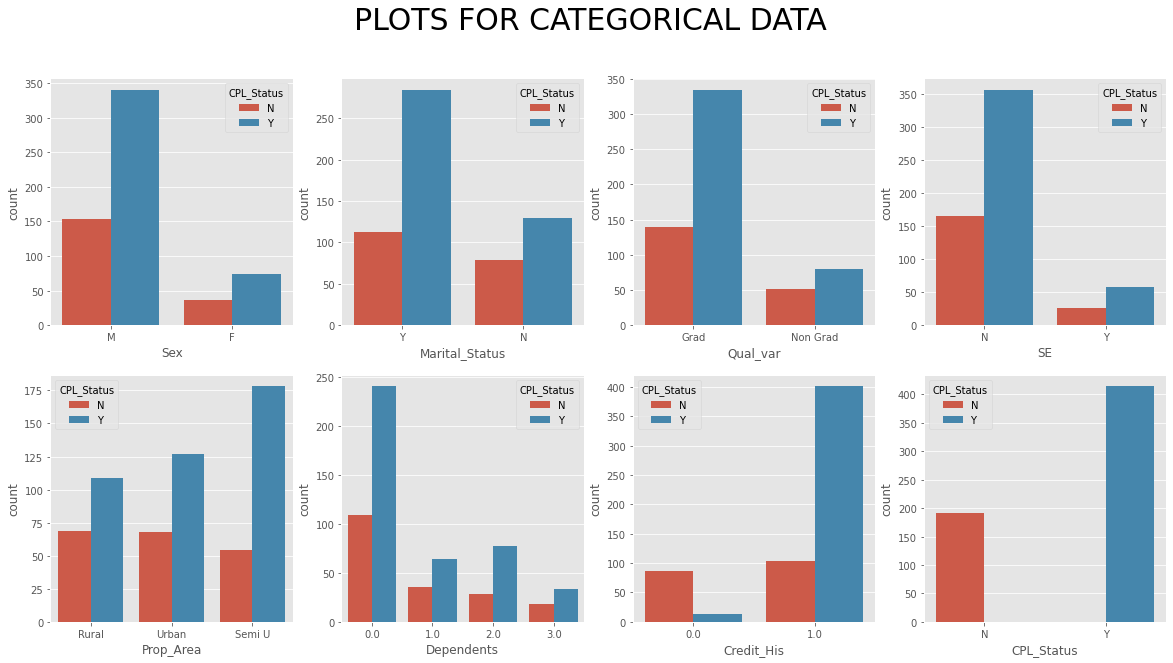

In [151]:
f,ax = plt.subplots(2,4,figsize=(20,10))
plt.suptitle("PLOTS FOR CATEGORICAL DATA", fontsize=30)
sns.countplot(x = "Sex", data = train, hue='CPL_Status',ax=ax[0,0] )
sns.countplot(x = "Marital_Status", data = train, hue='CPL_Status',ax=ax[0,1] )
sns.countplot(x = "Qual_var", data = train, hue='CPL_Status',ax=ax[0,2] )
sns.countplot(x = "SE", data = train, hue='CPL_Status',ax=ax[0,3] )
sns.countplot(x = "Prop_Area", data = train, hue='CPL_Status',ax=ax[1,0] )
sns.countplot(x = "Dependents", data = train, ax=ax[1,1], hue='CPL_Status')
sns.countplot(x = "Credit_His", data = train, ax=ax[1,2], hue='CPL_Status')
sns.countplot(x = "CPL_Status", data = train, ax=ax[1,3], hue='CPL_Status' )
plt.show()

In [152]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [153]:
oe = OrdinalEncoder()
oe.fit(cat_cols_x)
cat_cols_x_ = oe.transform(cat_cols_x)

le = LabelEncoder()
le.fit(cat_cols_y)
cat_cols_y_ = le.transform(cat_cols_y)

In [154]:
sbk = SelectKBest(score_func=chi2,k="all")

In [155]:
sbk.fit(cat_cols_x_,cat_cols_y_)

SelectKBest(k='all', score_func=<function chi2 at 0x7f6edc1de0d0>)

In [156]:
scores = sbk.scores_

In [157]:
scores_df = pd.DataFrame()
scores_df["Columns"] = cat_cols_x.columns.to_list()
scores_df["Scores"] = scores
scores_df.sort_values('Scores',ascending=False).set_index('Columns')

,Scores
Columns,
Credit_His,28.162521
Qual_var,3.740024
Marital_Status,1.980991
Prop_Area,0.301681
Sex,0.035887
SE,0.014844
Dependents,0.000290


In [158]:
scores_df.Columns.tolist()

['Sex',
 'Marital_Status',
 'Qual_var',
 'SE',
 'Prop_Area',
 'Dependents',
 'Credit_His']

In [159]:
sbk1 = SelectKBest(score_func=mutual_info_classif,k="all")

In [160]:
sbk1.fit(cat_cols_x_,cat_cols_y_)
scores1 = sbk1.scores_
scores_df1 = pd.DataFrame()
scores_df1["Columns"] = cat_cols_x.columns.to_list()
scores_df1["Scores"] = scores1
scores_df1.sort_values('Scores',ascending=False).set_index('Columns')

,Scores
Columns,
Credit_His,0.115920
Prop_Area,0.026972
Qual_var,0.015935
Dependents,0.008910
Marital_Status,0.004594
Sex,0.000000
SE,0.000000


In [161]:
add_cat = ['Credit_His','Qual_var','Marital_Status','SE','Sex']

## Numerical Data

In [162]:
num_cols = train.select_dtypes(include="number")
num_cols = num_cols.drop(["Credit_His","Dependents"],axis=1)

In [163]:
#num_cols

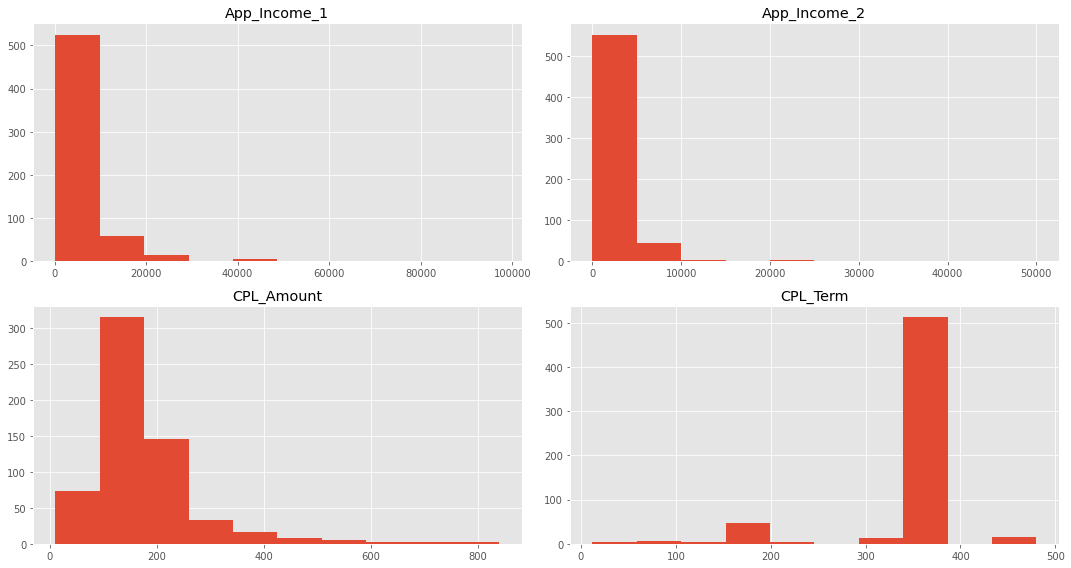

In [164]:
num_cols.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rfc = RandomForestClassifier(n_estimators=300,random_state=3)

In [167]:
rfc.fit(num_cols,cat_cols_y_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [168]:
importance = rfc.feature_importances_
importance

array([0.40885822, 0.20261337, 0.3189649 , 0.06956351])

In [169]:
num_imp = pd.DataFrame({"Columns":num_cols.columns.to_list(),"Importance_Score":importance})

In [170]:
num_imp.sort_values('Importance_Score',ascending=False).set_index('Columns')

,Importance_Score
Columns,
App_Income_1,0.408858
CPL_Amount,0.318965
App_Income_2,0.202613
CPL_Term,0.069564


In [171]:
add_num = ['App_Income_1','CPL_Amount','App_Income_2']

## Overall

In [172]:
print(cat_cols.columns,num_cols.columns)

Index(['Sex', 'Marital_Status', 'Qual_var', 'SE', 'Prop_Area', 'CPL_Status'], dtype='object') Index(['App_Income_1', 'App_Income_2', 'CPL_Amount', 'CPL_Term'], dtype='object')


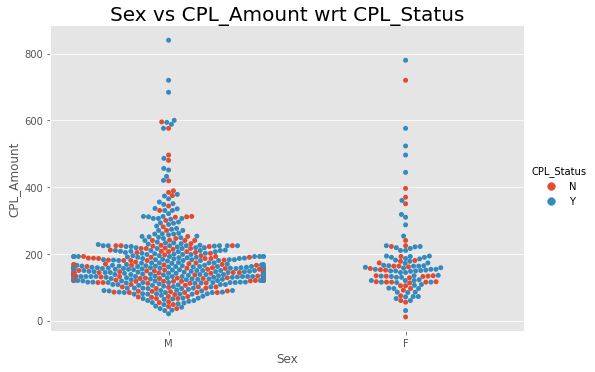

In [173]:
sns.catplot(x='Sex',y='CPL_Amount',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("Sex vs CPL_Amount wrt CPL_Status",fontsize=20)
plt.show()

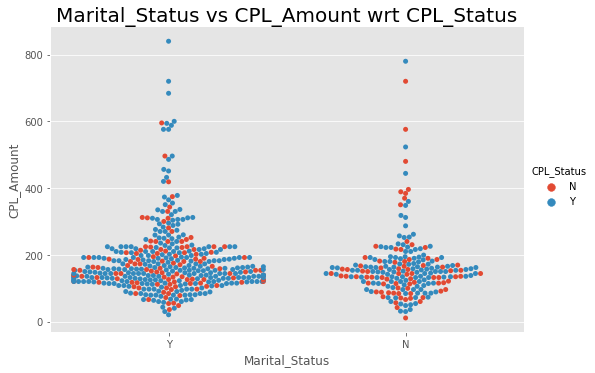

In [174]:
sns.catplot(x='Marital_Status',y='CPL_Amount',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("Marital_Status vs CPL_Amount wrt CPL_Status",fontsize=20)
plt.show()

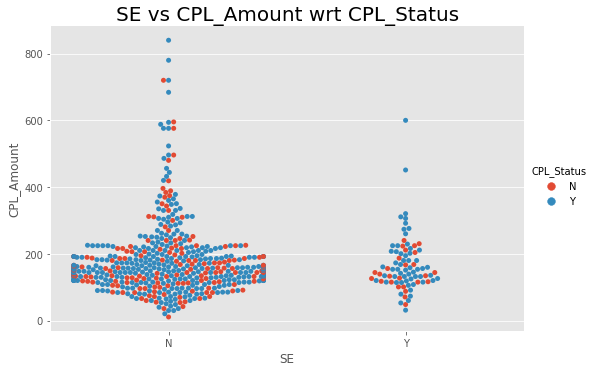

In [175]:
sns.catplot(x='SE',y='CPL_Amount',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("SE vs CPL_Amount wrt CPL_Status",fontsize=20)
plt.show()

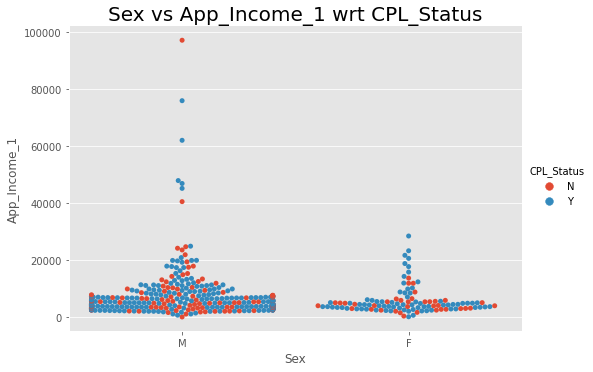

In [176]:
sns.catplot(x='Sex',y='App_Income_1',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("Sex vs App_Income_1 wrt CPL_Status",fontsize=20)
plt.show()

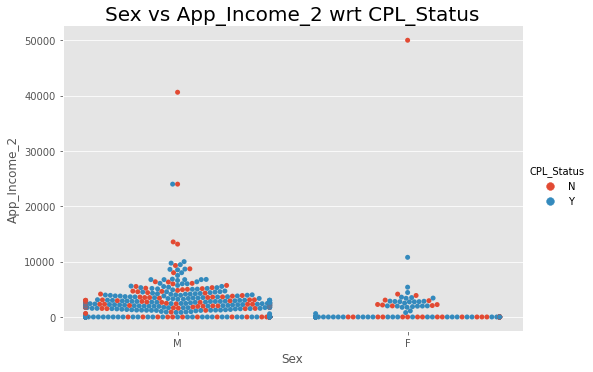

In [177]:
sns.catplot(x='Sex',y='App_Income_2',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("Sex vs App_Income_2 wrt CPL_Status",fontsize=20)
plt.show()

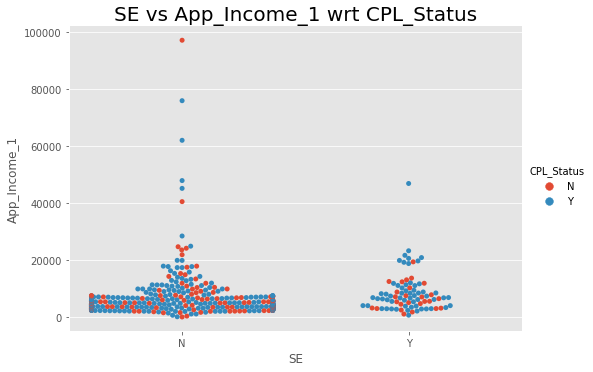

In [178]:
sns.catplot(x='SE',y='App_Income_1',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("SE vs App_Income_1 wrt CPL_Status",fontsize=20)
plt.show()

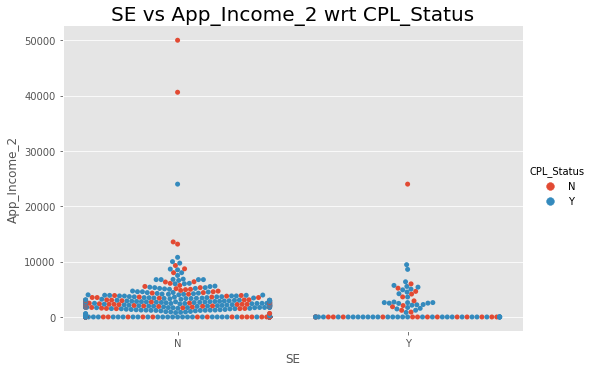

In [179]:
sns.catplot(x='SE',y='App_Income_2',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("SE vs App_Income_2 wrt CPL_Status",fontsize=20)
plt.show()

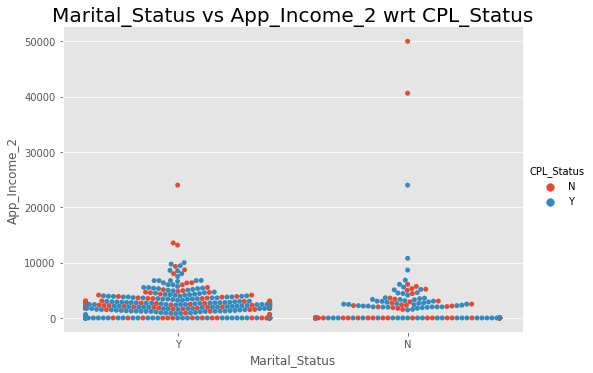

In [47]:
sns.catplot(x='Marital_Status',y='App_Income_2',hue='CPL_Status',data=train,height=5,aspect=1.5,kind='swarm')
plt.title("Marital_Status vs App_Income_2 wrt CPL_Status",fontsize=20)
plt.show()

# PREPARING DATA FOR MODELLING

In [180]:
from sklearn.preprocessing import LabelEncoder

In [181]:
print(add_cat,add_num)

['Credit_His', 'Qual_var', 'Marital_Status', 'SE', 'Sex'] ['App_Income_1', 'CPL_Amount', 'App_Income_2']


In [182]:
new_train = train[['Credit_His', 'Qual_var', 'Marital_Status', 'SE', 'Sex','App_Income_1', 'CPL_Amount', 'App_Income_2','CPL_Status','Dependents']]

In [183]:
new_train.head()

,Credit_His,Qual_var,Marital_Status,SE,Sex,App_Income_1,CPL_Amount,App_Income_2,CPL_Status,Dependents
0,1.0,Grad,Y,N,M,5499.6,153.6,1809.6,N,1.0
1,1.0,Grad,Y,Y,M,3600.0,79.2,0.0,Y,0.0
2,1.0,Non Grad,Y,N,M,3099.6,144.0,2829.6,Y,0.0
3,1.0,Grad,N,N,M,7200.0,169.2,0.0,Y,0.0
4,1.0,Grad,Y,Y,M,6500.4,320.4,5035.2,Y,2.0


In [184]:
le = LabelEncoder()
le.fit(new_train['CPL_Status'])
target = np.array(le.transform(new_train['CPL_Status']))
new_train = new_train.drop('CPL_Status',axis=1)

In [185]:
d1 = pd.get_dummies(new_train['Qual_var'],drop_first=True,prefix='Qual_var')
d2 = pd.get_dummies(new_train['SE'],drop_first=True,prefix='SE')
d3 = pd.get_dummies(new_train['Sex'],drop_first=True,prefix='Sex')
d4 = pd.get_dummies(new_train['Marital_Status'],drop_first=True,prefix='Marital_Status')

In [186]:
new_train = pd.concat([new_train.drop(['SE','Sex','Marital_Status','Qual_var'],axis=1),d1,d2,d3,d4],axis=1)

In [187]:
new_train.head()

,Credit_His,App_Income_1,CPL_Amount,App_Income_2,Dependents,Qual_var_Non Grad,SE_Y,Sex_M,Marital_Status_Y
0,1.0,5499.6,153.6,1809.6,1.0,0,0,1,1
1,1.0,3600.0,79.2,0.0,0.0,0,1,1,1
2,1.0,3099.6,144.0,2829.6,0.0,1,0,1,1
3,1.0,7200.0,169.2,0.0,0.0,0,0,1,0
4,1.0,6500.4,320.4,5035.2,2.0,0,1,1,1


In [188]:
# pairplot = new_train.copy()
# pairplot['target'] = target

In [189]:
#sns.pairplot(pairplot,hue='Sex_M')

# MODELLING

## RANDOM FOREST CLASSIFIER

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfc = RandomForestClassifier(n_estimators=300,random_state=3)

In [192]:
rfc.fit(new_train,target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [193]:
scores = cross_val_score(rfc,new_train,target,cv=9)

In [194]:
scores

array([0.76470588, 0.77941176, 0.71641791, 0.76119403, 0.76119403,
       0.8358209 , 0.76119403, 0.76119403, 0.80597015])

In [195]:
print("Maximum Accuracy: {:.2f}%".format(max(scores)*100))
print("Standard Deviation among accuracies: {:.4f}".format(scores.std()))

Maximum Accuracy: 83.58%
Standard Deviation among accuracies: 0.0314


### Spliting into train_test


In [196]:
x_train, x_test, y_train, y_test = train_test_split(new_train,target,test_size=0.25,stratify=target,random_state=3)

In [197]:
rfc1 = RandomForestClassifier(n_estimators=300,random_state=3)
rfc1.fit(x_train,y_train)
y_pred = rfc1.predict(x_test)
report = pd.DataFrame(classification_report(y_pred,y_test, output_dict=True)).transpose()
report

,precision,recall,f1-score,support
0,0.500000,0.666667,0.571429,36.000000
1,0.884615,0.793103,0.836364,116.000000
accuracy,0.763158,0.763158,0.763158,0.763158
macro avg,0.692308,0.729885,0.703896,152.000000
weighted avg,0.793522,0.763158,0.773616,152.000000


## ANN

In [198]:
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler

In [199]:
from sklearn.preprocessing import MinMaxScaler
def scaler(data):
  scale = MinMaxScaler()
  cols = data.columns.to_list()
  temp = scale.fit_transform(data)
  data = pd.DataFrame(temp,columns=cols)
  return data

In [200]:
data = scaler(new_train)

In [201]:
# from tensorflow.keras.optimizers import Adagrad
# optimizer = Adagrad(lr=0.01)


In [202]:
# model = tf.keras.models.Sequential([
#                                     tf.keras.layers.Dense(128,activation='relu',input_dim =9),
#                                     tf.keras.layers.Dropout(0.2),
#                                     tf.keras.layers.Dense(64,activation='relu'),
#                                     tf.keras.layers.Dense(32,activation='relu'),
#                                     tf.keras.layers.Dense(1,activation='sigmoid')
# ])

In [203]:
# model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [204]:
# model.fit(data,target,epochs=30,batch_size=5)

## DECISION TREE CLASSIFIER

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
dtc = DecisionTreeClassifier()

In [207]:
dtc.fit(new_train,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
score_dtc = cross_val_score(dtc,new_train,target,cv=10)

In [209]:
score_dtc

array([0.7704918 , 0.67213115, 0.68852459, 0.60655738, 0.70491803,
       0.68333333, 0.71666667, 0.68333333, 0.63333333, 0.73333333])

In [210]:
print("Maximum Accuracy: {:.2f}%".format(max(score_dtc)*100))
print("Standard Deviation among accuracies: {:.4f}".format(score_dtc.std()))

Maximum Accuracy: 77.05%
Standard Deviation among accuracies: 0.0446


### Spliting into train_test

In [211]:
dtc1 = DecisionTreeClassifier(random_state=3)
dtc1.fit(x_train,y_train)
y_pred = dtc1.predict(x_test)
report = pd.DataFrame(classification_report(y_pred,y_test, output_dict=True)).transpose()
report

,precision,recall,f1-score,support
0,0.541667,0.400000,0.460177,65.000000
1,0.625000,0.747126,0.680628,87.000000
accuracy,0.598684,0.598684,0.598684,0.598684
macro avg,0.583333,0.573563,0.570403,152.000000
weighted avg,0.589364,0.598684,0.586356,152.000000


## SVM

In [212]:
from sklearn import svm

In [213]:
clf = svm.SVC()

In [214]:
clf.fit(new_train,target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [215]:
score_svm = cross_val_score(clf,data, target,cv=10)

In [216]:
score_svm

array([0.81967213, 0.80327869, 0.7704918 , 0.75409836, 0.78688525,
       0.78333333, 0.86666667, 0.85      , 0.81666667, 0.81666667])

In [217]:
print("Maximum Accuracy: {:.2f}%".format(max(score_svm)*100))
print("Standard Deviation among accuracies: {:.4f}".format(score_svm.std()))

Maximum Accuracy: 86.67%
Standard Deviation among accuracies: 0.0330


## LOGISTIC REGRESSION

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
lr = LogisticRegression(max_iter=400)

In [220]:
lr.fit(new_train,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
score_lr = cross_val_score(lr,data,target,cv=10)

In [222]:
score_lr

array([0.81967213, 0.80327869, 0.7704918 , 0.75409836, 0.78688525,
       0.78333333, 0.86666667, 0.85      , 0.81666667, 0.81666667])

In [223]:
print("Maximum Accuracy: {:.2f}%".format(max(score_lr)*100))
print("Standard Deviation among accuracies: {:.4f}".format(score_lr.std()))

Maximum Accuracy: 86.67%
Standard Deviation among accuracies: 0.0330


### Spliting into train_test

In [224]:
lr1 = LogisticRegression()
lr1.fit(x_train,y_train)
y_pred = lr1.predict(x_test)
report = pd.DataFrame(classification_report(y_pred,y_test, output_dict=True)).transpose()
report

,precision,recall,f1-score,support
0,0.458333,0.880000,0.602740,25.000000
1,0.971154,0.795276,0.874459,127.000000
accuracy,0.809211,0.809211,0.809211,0.809211
macro avg,0.714744,0.837638,0.738599,152.000000
weighted avg,0.886808,0.809211,0.829768,152.000000


## ADABOOST CLASSIFIER

In [225]:
from sklearn.ensemble import AdaBoostClassifier

In [226]:
clf_ada = AdaBoostClassifier()

In [227]:
clf_ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [228]:
score_ada = cross_val_score(clf_ada,new_train,target,cv=10)

In [229]:
score_ada

array([0.83606557, 0.78688525, 0.73770492, 0.75409836, 0.7704918 ,
       0.78333333, 0.8       , 0.81666667, 0.73333333, 0.78333333])

In [230]:
print("Maximum Accuracy: {:.2f}%".format(max(score_ada)*100))
print("Standard Deviation among accuracies: {:.4f}".format(score_ada.std()))

Maximum Accuracy: 83.61%
Standard Deviation among accuracies: 0.0311


In [231]:
y_pred = clf_ada.predict(x_test)

In [232]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.48      0.77      0.59        30
           1       0.93      0.80      0.86       122

    accuracy                           0.79       152
   macro avg       0.71      0.78      0.72       152
weighted avg       0.84      0.79      0.81       152



# PREPARING TEST DATA

In [233]:
test = test[['Credit_His', 'Qual_var', 'Marital_Status', 'SE', 'Sex','App_Income_1', 'CPL_Amount', 'App_Income_2', 'Dependents']]

In [234]:
test=test.fillna(method='ffill')

In [235]:
td1 = pd.get_dummies(test['Qual_var'],drop_first=True,prefix='Qual_var')
td2 = pd.get_dummies(test['SE'],drop_first=True,prefix='SE')
td3 = pd.get_dummies(test['Sex'],drop_first=True,prefix='Sex')
td4 = pd.get_dummies(test['Marital_Status'],drop_first=True,prefix='Marital_Status')

In [236]:
new_test = pd.concat([test.drop(['SE','Sex','Marital_Status','Qual_var'],axis=1),td1,td2,td3,td4],axis=1)

In [237]:
new_test.head()

,Credit_His,App_Income_1,CPL_Amount,App_Income_2,Dependents,Qual_var_Non Grad,SE_Y,Sex_M,Marital_Status_Y
0,1.0,6864.0,132.0,0.0,0,0,0,1,1
1,1.0,3691.2,151.2,1800.0,1,0,0,1,1
2,1.0,6000.0,249.6,2160.0,2,0,0,1,1
3,1.0,2808.0,120.0,3055.2,2,0,0,1,1
4,1.0,3931.2,93.6,0.0,0,1,0,1,0


# TEST DATA PREDICTION

In [238]:
predict_rfc = rfc.predict(new_test)
predict_dtc = dtc.predict(new_test)
predict_svm = clf.predict(new_test)
predict_lr = lr.predict(new_test)
predict_ada = clf_ada.predict(new_test)

In [239]:
predict_ada = clf_ada.predict(new_test)
results = pd.DataFrame({"Random_Forest":predict_rfc,"Decision_Tree":predict_dtc,"SVM":predict_svm,"Logistic_Regression":predict_lr, "AdaBoost":predict_ada})

In [240]:
# results

In [243]:
final = get_majority(results)

In [244]:
results['Final_Verdict'] = final

In [245]:
# results.Final_Verdict.value_counts()

In [246]:
results

,Random_Forest,Decision_Tree,SVM,Logistic_Regression,AdaBoost,Final_Verdict
0,1,0,1,1,1,Y
1,1,1,1,1,1,Y
2,1,1,1,1,1,Y
3,1,1,1,1,1,Y
4,0,0,1,1,1,Y
...,...,...,...,...,...,...
362,1,1,1,1,1,Y
363,1,1,1,1,1,Y
364,1,1,1,1,1,Y
365,1,1,1,1,1,Y


In [247]:
results.Final_Verdict.value_counts()

Y    304
N     63
Name: Final_Verdict, dtype: int64

The final Verdict shows the possible decision the bank should be taking.

In [249]:
test_prediction = orig_test.copy()

In [251]:
test_prediction['Predicted_CPL_Status'] = results['Final_Verdict']

In [253]:
test_prediction.to_csv("Test_Data_Predictions.csv")